Hábitos de Asistencia al Teatro Musical (Muestra Curada 2011–2025)

Dataset derivado del Anuario de Estadísticas Culturales 2025, seleccionado y normalizado. Recoge una muestra estructurada sobre la evolución de la asistencia al teatro musical entre 2011 y 2025, con foco en tendencias, brechas de participación y patrones de consumo. Su objetivo es facilitar análisis claros y comparables, sin constituir un registro exhaustivo del sector.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Shape: (5, 4)

Head:
   anio  total  hombres  mujeres
0  2011   24.4     24.7     24.1
1  2015   21.4     19.7     22.7
2  2019   25.0     21.4     27.9
3  2022   20.5     20.2     20.7
4  2025   26.5     25.9     26.9

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   anio     5 non-null      int64  
 1   total    5 non-null      float64
 2   hombres  5 non-null      float64
 3   mujeres  5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 292.0 bytes
None

Describe:
              anio      total    hombres    mujeres
count     5.000000   5.000000   5.000000   5.000000
mean   2018.400000  23.560000  22.380000  24.460000
std       5.549775   2.522499   2.768935   2.964456
min    2011.000000  20.500000  19.700000  20.700000
25%    2015.000000  21.400000  20.200000  22.700000
50%    2019.000000  24.400000  21.400000  24.100000
75%    2022

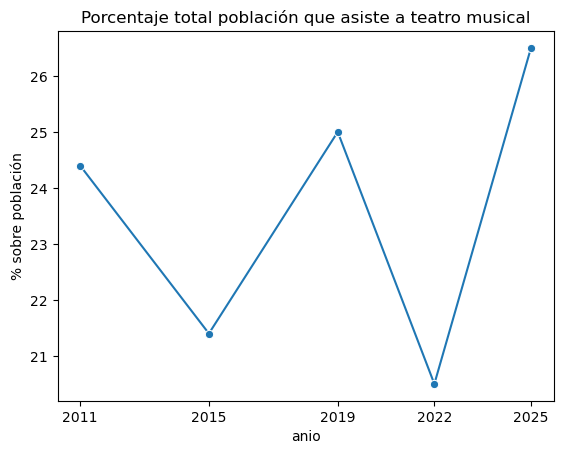

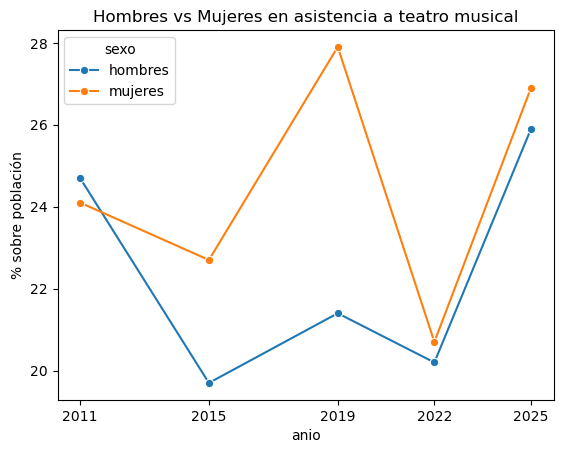

C:\Users\elaru\AppData\Local\Temp\ipykernel_1780\1521907803.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["anio"])


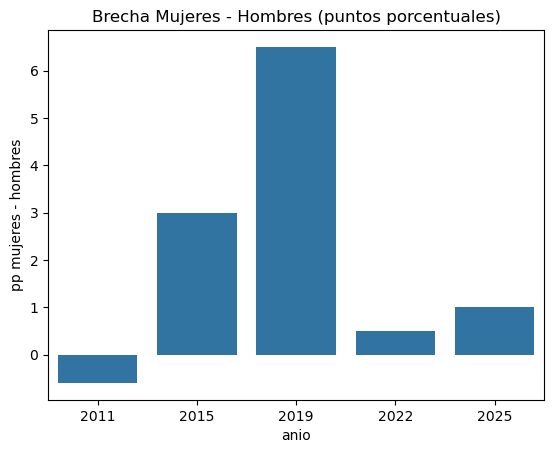

C:\Users\elaru\AppData\Local\Temp\ipykernel_1780\1521907803.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["anio"])


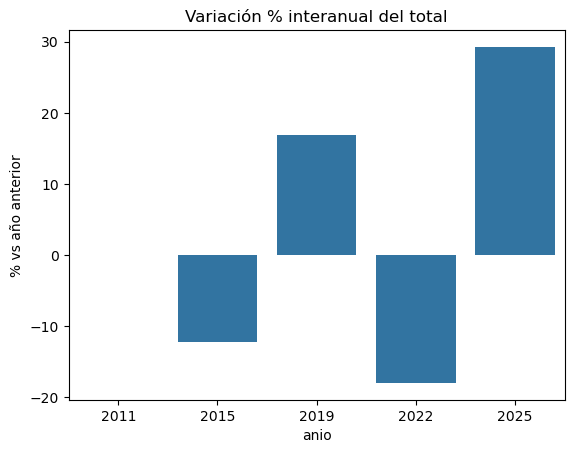

In [ ]:

# 1. Cargar datos
df = pd.read_csv("teatro_musical_habitos.csv")  # adapta la ruta

# 2. Limpieza básica
df.columns = ["anio", "total", "hombres", "mujeres"]

# pasar a numérico por si algo entra como string
for col in ["total", "hombres", "mujeres"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 3. Vista general
print("Shape:", df.shape)
print("\nHead:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())

# 4. Valores nulos
print("\nNulos por columna:")
print(df.isna().sum())

# 5. Nuevas métricas
df["brecha_mujeres_hombres"] = df["mujeres"] - df["hombres"]
df["var_pct_total"] = df["total"].pct_change() * 100

print("\nDataFrame con nuevas columnas:")
print(df)

# 6. Visualizaciones
plt.figure()
sns.lineplot(data=df, x="anio", y="total", marker="o")
plt.xticks(df["anio"])
plt.title("Porcentaje total población que asiste a teatro musical")
plt.ylabel("% sobre población")
plt.show()

# 2) Línea HOMBRES vs MUJERES → con xticks forzados
plt.figure()
sns.lineplot(
    data=df.melt(id_vars="anio", value_vars=["hombres","mujeres"],
                 var_name="sexo", value_name="porcentaje"),
    x="anio", y="porcentaje", hue="sexo", marker="o"
)
plt.xticks(df["anio"])
plt.title("Hombres vs Mujeres en asistencia a teatro musical")
plt.ylabel("% sobre población")
plt.show()

# 3) BARPLOT BRECHA → SIN cambiar posiciones, solo etiquetas
plt.figure()
ax = sns.barplot(data=df, x="anio", y="brecha_mujeres_hombres")
ax.set_xticklabels(df["anio"])
plt.title("Brecha Mujeres - Hombres (puntos porcentuales)")
plt.ylabel("pp mujeres - hombres")
plt.show()

# 4) BARPLOT VARIACIÓN % → igual
plt.figure()
ax = sns.barplot(data=df, x="anio", y="var_pct_total")
ax.set_xticklabels(df["anio"])
plt.title("Variación % interanual del total")
plt.ylabel("% vs año anterior")
plt.show()




In [ ]:
df.to_csv("teatro_musical_habitos_2011_2025_limpio.csv", index=False)
print("CSV limpio guardado correctamente.")


CSV limpio guardado correctamente.


Conclusiones técnicas 

Tendencia creciente: la asistencia total al teatro musical sube en el largo plazo y alcanza su máximo en 2025.

Alta volatilidad: el sector muestra descensos pronunciados en 2015 y 2022, seguidos de recuperaciones fuertes en 2019 y 2025.

Dominio femenino: las mujeres mantienen mayores tasas de asistencia en todos los años analizados.

Brecha variable: la diferencia mujeres–hombres fluctúa, con picos en 2019 y normalización en 2025.

2025 consolida recuperación: máximos en participación y mejora generalizada en ambos segmentos.